## Modifications

In [7]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np 
import random
import scipy

In [385]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, p_intro=0.1, network_size=50, k_neigh=5, alpha=0.04, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
            
            p_intro(float): possibility of two nodes meeting because they have a common friend
            
        '''
        self.network_size = network_size
        self.k_neigh=k_neigh
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.p_intro=p_intro

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(self.network_size,self.k_neigh , 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            #initializing the opinions of the nodes to a random integer between 0 and 1 
            self.graph.nodes[node]['1'] = random.randint(0, 1)
            self.graph.nodes[node]['2'] = random.randint(0, 1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Drawing the network 
        The colors of the nodes in each of the panels represent their opinions about each of the 3 topics
        Network connection remains the same in the 3 plots. 
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        plt.subplot(1,2,1)
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['1'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.subplot(1,2,2)
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['2'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        
        plt.title('Step: ' + str(self.step))
        

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge 
            edge=random.choice(list(self.graph.edges))
            weight=self.graph.edges[edge]['weight']
            ops_topic1=[self.graph.nodes[n]['1'] for n in edge]
            ops_topic2=[self.graph.nodes[n]['2'] for n in edge]
            #select a topic to talk about 
            topic_s=random.choice(['1','2'])
            opinions = [self.graph.nodes[n][str(topic_s)] for n in edge]
            #Update node opinions and edge weight 
            for i in [0, 1]:
                self.graph.nodes[edge[i]][str(topic_s)] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            #Friend introductions, happens with probability p=0.1 at each time step 
            if random.uniform(0, 1) <self.p_intro:
                introduction=True
                common_friends=[]
                for node in self.graph.nodes:
                    if self.graph.degree[node]>=2:
                        common_friends.append(node)
                    #this checks if there are no nodes that have 2 or more friends that they can introduce
                    if len(common_friends)!=0:
                        selected_friend=random.choice(common_friends) 
                    else:
                        introduction=False #
                if introduction==True:
                    friends=random.sample(list(self.graph.neighbors(selected_friend)),k=2)
                    new_friendship=friends
                    if new_friendship not in self.graph.edges:
                        self.graph.add_edge(new_friendship[0], new_friendship[1], weight=0.5)
            # Remove very weak connections
            for edge in self.graph.edges: 
                if self.graph.edges[edge]['weight'] <0.5:
                    self.graph.remove_edge(*edge)
        self.step += 1

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
100
100
31
99
165
224
249
267
279
296
304


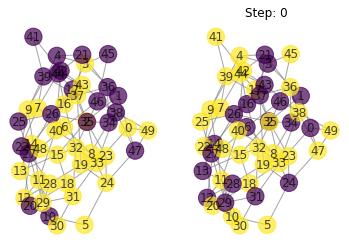

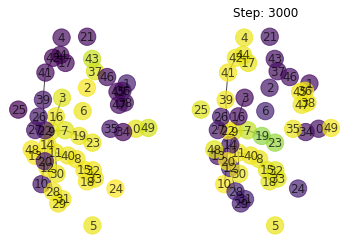

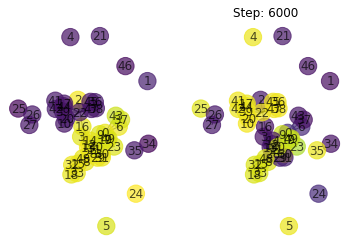

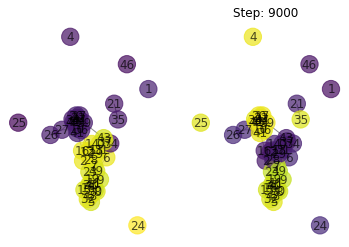

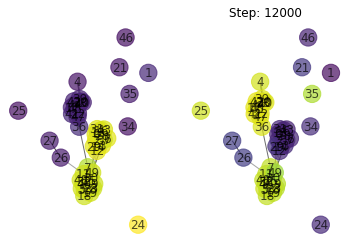

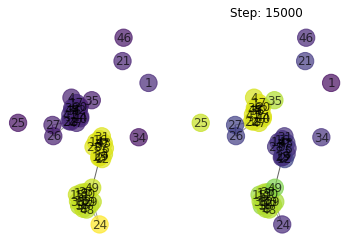

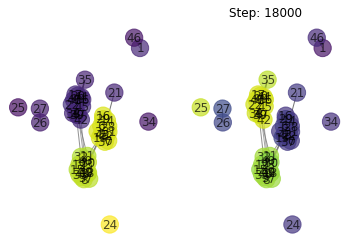

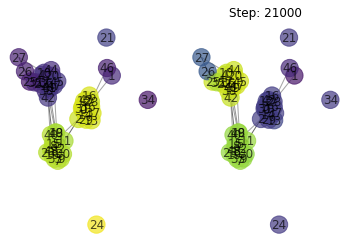

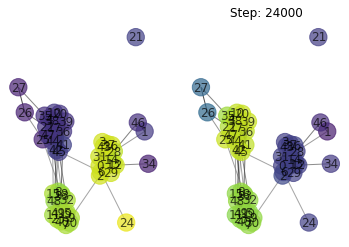

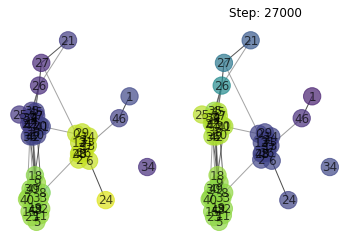

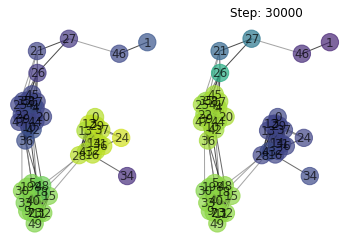

In [386]:
sim = SocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe()
print([sim.graph.edges[i, j]['weight'] for i, j in sim.graph.edges])
print(len(sim.graph.edges))
for i in range(10):
    print(len(sim.graph.edges))
    for i in range(3000):
        sim.update()
    plt.figure()
    sim.observe()

## Part 2: Local Analysis

With the proposed modifications, the relationship between nodes depends on three rather than just one topic, and we now have another way of creating new relationships that gives preference to nodes that share a common friend. However, the effect of the parameters alpha, beta, and gamma remains unchanged, except that over time, the evolution of the relationship depends on two different topics. 

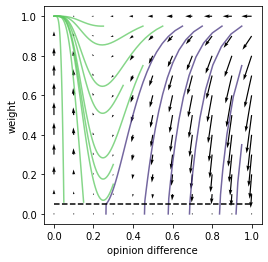

In [196]:
#original local analysis without the addition of a second topic 

from matplotlib import pyplot
import itertools
import scipy

alpha = 0.03
beta = 0.3
gamma = 4

cmap = pyplot.cm.viridis  # good for color blindness

# Plot traces of how opinion and weight change over time
for opinion, weight in [
    [0.25, 0.95], [0.45, 0.95], [0.55, 0.95], [0.65, 0.95], [0.75, 0.95],
    [0.85, 0.95], [0.95, 0.95], [0.35, 0.65], [0.45, 0.75], [0.95, 0.75],
    [0.95, 0.35], [0.3, 0.25], [0.3, 0.15], [0.15, 0.06], [0.05, 0.06]
]:
    ow = [[opinion, 0.0, weight]]
    for i in range(100):
        delta_o = alpha * ow[-1][2] * (ow[-1][1] - ow[-1][0])
        delta_w = (
            beta * ow[-1][2] * (1-ow[-1][2]) *
            (1-gamma*abs(ow[-1][1] - ow[-1][0])))
        new_weight = ow[-1][2] + delta_w
        if new_weight < 0.05:
            new_weight = 0
        ow.append([ow[-1][0] + delta_o, ow[-1][1] - delta_o, new_weight])
    pyplot.plot(
        [row[0] - row[1] for row in ow],
        [row[2] for row in ow],
        color=(cmap(0.15) if ow[-1][2] == 0 else cmap(0.75)),
        alpha=0.75)

# Plot vector field
opinion = scipy.linspace(0, 1, 11)  # the difference in opinion, |o_i - o_j|
weight = scipy.linspace(0, 1, 11)   # the edge weight, w_ij
ow_grid = scipy.meshgrid(opinion, weight)
delta_o_grid = -2*alpha * ow_grid[1] * ow_grid[0]
delta_w_grid = beta * ow_grid[1] * (1-ow_grid[1]) * (1 - gamma * ow_grid[0])
pyplot.quiver(ow_grid[0], ow_grid[1], delta_o_grid, delta_w_grid)

# Annotate plot
pyplot.xlabel('opinion difference')
pyplot.ylabel('weight')
pyplot.plot([0, 1], [0.05, 0.05], 'k--')
pyplot.axis('square')
pyplot.show()


In [239]:

from matplotlib import pyplot
import itertools
import scipy
def plot_vector_field(alpha,beta,gamma):
    '''
    local analysis with a new grid including the second 
    topic and trying to display the relationship evolution 
    using the sum of the difference in opinions
    '''
    cmap = pyplot.cm.viridis  # good for color blindness

    # Plot traces of how opinion and weight change over time
    for opinion1, weight,opinion2 in[
        [0.25, 0.95,0.25], [0.45, 0.95,0], [0.55, 0.95,0.25], [0.65, 0.95,0], [0.75, 0.95,0],
        [0.85, 0.45,0.35], [0.35, 0.95,0.65], [0.75, 0.65,0.25], [0.95, 0.25,0.45], [0.95, 0.95,0.65],
        [0, 0.95,0],[0.95, 0.45,0.95], [0.75,0.95,0.75], [0.8,0.95,0.5], [0.25,0.5,0.25]]:
        ow = [[0.0, 0.0, weight, opinion1, opinion2]]
        new_weight=1
        for i in range(100):
            if new_weight==0:
                break
            delta_t1=alpha*ow[-1][2]*(ow[-1][0] - ow[-1][3])
            delta_t2=alpha*ow[-1][2]*(ow[-1][1] - ow[-1][4])
            delta_w = (beta * ow[-1][2] * (1-ow[-1][2]) *
                (1-gamma*(abs(ow[-1][3]-ow[-1][0])+abs(ow[-1][4] - ow[-1][1]))))
            new_weight = ow[-1][2] + delta_w
            if new_weight<0.05:
                new_weight=0
            ow.append([ow[-1][0] - delta_t1, ow[-1][1] - delta_t2, new_weight, ow[-1][3] + delta_t1, ow[-1][4] + delta_t2])
        pyplot.plot(
            [abs(row[0] - row[3])+abs(row[1] - row[4]) for row in ow],
            [row[2] for row in ow],
            color=(cmap(0.15) if ow[-1][2] == 0 else cmap(0.75)),
            alpha=0.75)

    # Plot vector field
    opinion_difference = scipy.linspace(0, 2, 12)  # the difference in opinion, |o_i - o_j|
    weight = scipy.linspace(0, 1, 6)   # the edge weight, w_ij
    ow_grid = scipy.meshgrid(opinion_difference, weight)
    delta_o_grid = -2*alpha * ow_grid[1] * ow_grid[0]
    delta_w_grid = beta * ow_grid[1] * (1-ow_grid[1]) * (1 - gamma * ow_grid[0])
    plt.quiver(ow_grid[0], ow_grid[1], delta_o_grid, delta_w_grid)

    # Annotate plot
    pyplot.title('alpha: %.3f beta: %.3f gamma: %.3f' %(alpha,beta,gamma))
    pyplot.xlabel('opinion difference sum')
    pyplot.ylabel('edge weight')
    pyplot.plot([0, 2], [0.05, 0.05], 'k--')
    pyplot.show()

I will create several vector fields keeping two parameters constant and changing the third one according to its allowed range and looking at the vector fields in order to analyze how the variations in that parameter affect the outcomes of a relationship between two nodes at different points of opinion difference and edge weight, whether the relationship will stay or if it will break apart eventually. 

I will shorten the ranges as I notice the sections of the ranges that I should focus on. 

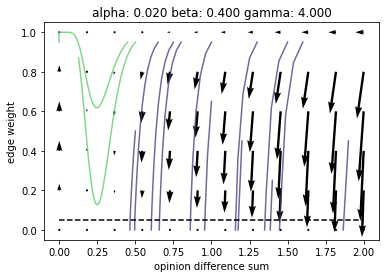

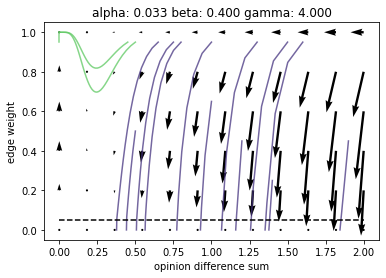

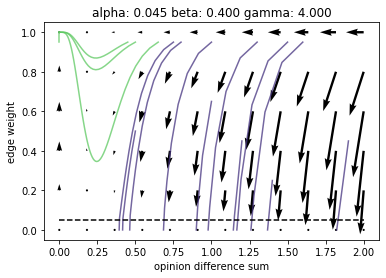

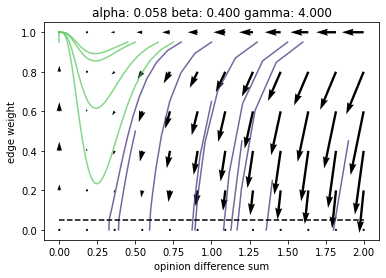

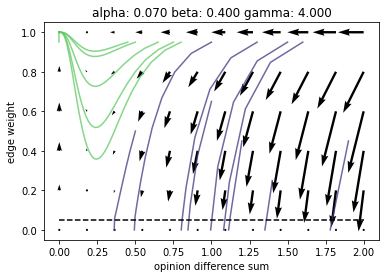

In [503]:
constant_alpha = 0.04
constant_beta = 0.4
constant_gamma = 4
alpha_range=np.linspace(0.02,0.07,5)
for i in alpha_range:
    plot_vector_field(i,constant_beta,constant_gamma)

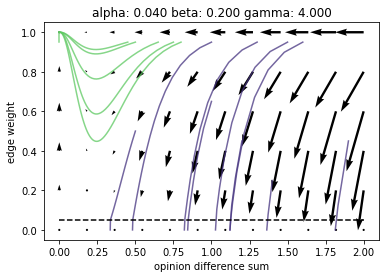

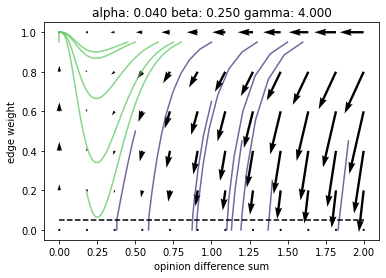

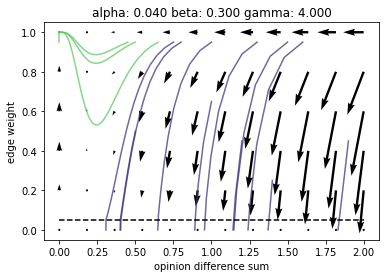

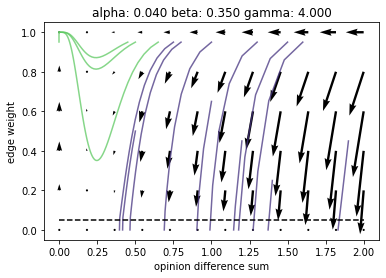

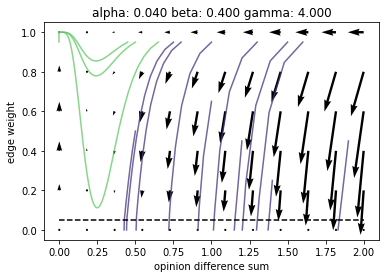

In [504]:
beta_range=np.linspace(0.2,0.4,5)
for i in beta_range:
    plot_vector_field(constant_alpha,i,constant_gamma)

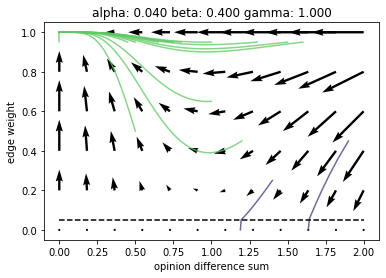

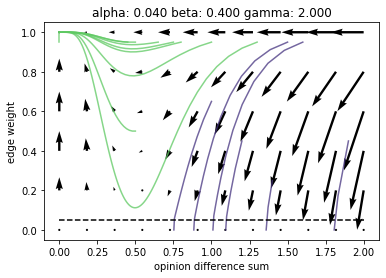

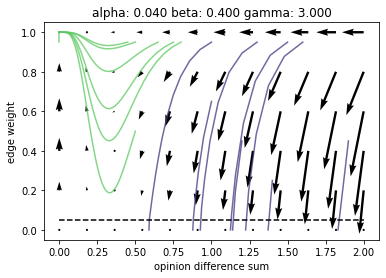

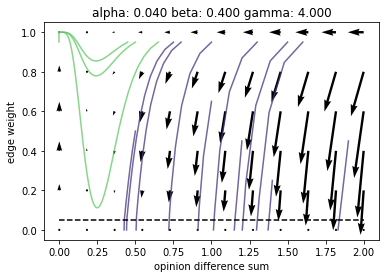

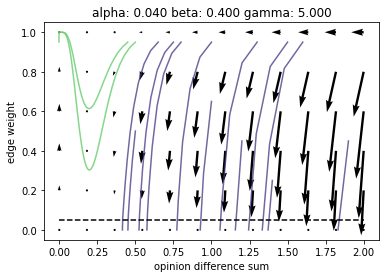

In [505]:
gamma_range=np.linspace(1,5,5)
for i in gamma_range:
    plot_vector_field(constant_alpha,constant_beta,i)

## Part 4: Simulation Analysis

In order to look at clustering I will analyze up to the 20,000th step and look at the clustering degree calculated by networkx and vary alpha, beta, and gamma.

In [532]:
alpha_range1=np.linspace(0.01,0.06,9)
beta_range1=np.linspace(0.2,0.7,9)
gamma_range1=np.linspace(1,6,9)

calculating average clustering coefficient for varying alpha values


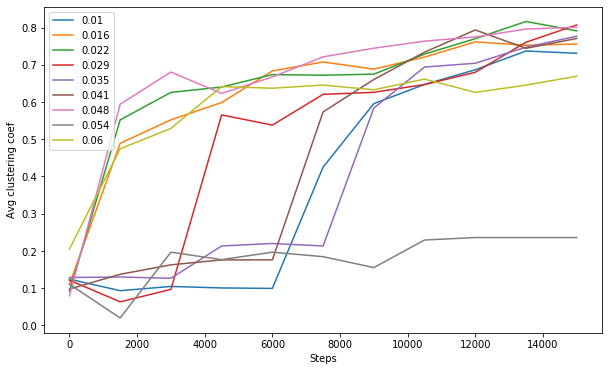

In [530]:
print('calculating average clustering coefficient for varying alpha values')
plt.figure(figsize=(10,6))
finalclustering=np.zeros(9)
for i in range(9):
    clustering_consensus=np.zeros((1,11))
    at_steps=[0]
    for x in range(1):
        sim=SocialDynamicsSimulation(alpha=alpha_range1[i])
        sim.initialize()
        clustering_consensus[x][0]=nx.average_clustering(sim.graph)
        for cut in range(10):
            for s in range(1500):
                sim.update()
            clustering_consensus[x][cut+1]=nx.average_clustering(sim.graph)
            if x==0:
                at_steps.append(sim.step)
    clustering=np.mean(clustering_consensus,axis=0)        
    finalclustering[i]=clustering[-1]
    plt.plot(at_steps,clustering,label=np.around(alpha_range1[i],decimals=3))
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Avg clustering coef')
plt.show()

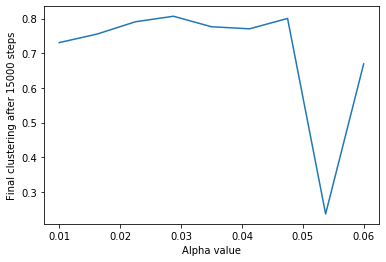

In [531]:
plt.plot(alpha_range1,finalclustering)
plt.xlabel('Alpha value')
plt.ylabel('Final clustering after 15000 steps')
plt.show()

calculating average clustering coefficient for varying beta values


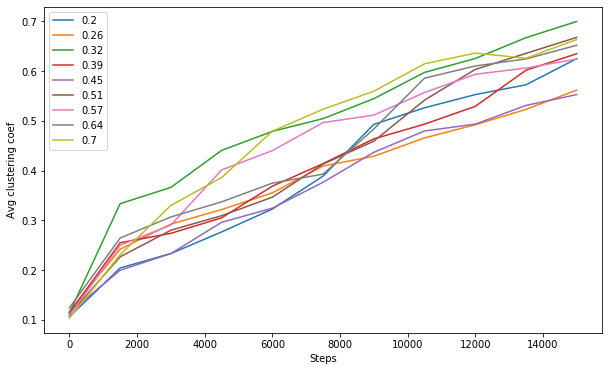

In [519]:
print('calculating average clustering coefficient for varying beta values')
plt.figure(figsize=(10,6))
finalclustering=np.zeros(9)
for i in range(9):
    clustering_consensus=np.zeros((15,11))
    at_steps=[0]
    for x in range(15):
        sim=SocialDynamicsSimulation(beta=beta_range1[i])
        sim.initialize()
        clustering_consensus[x][0]=nx.average_clustering(sim.graph)
        for cut in range(10):
            for s in range(1500):
                sim.update()
            clustering_consensus[x][cut+1]=nx.average_clustering(sim.graph)
            if x==0:
                at_steps.append(sim.step)
    clustering=np.mean(clustering_consensus,axis=0)        
    finalclustering[i]=clustering[-1]
    plt.plot(at_steps,clustering,label=np.around(beta_range1[i],decimals=2))
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Avg clustering coef')
plt.show()

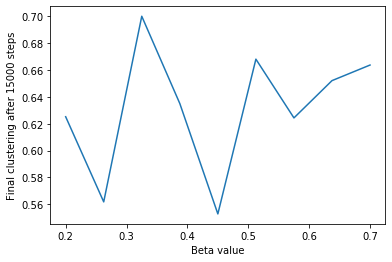

In [520]:
plt.plot(beta_range1,finalclustering)
plt.xlabel('Beta value')
plt.ylabel('Final clustering after 15000 steps')
plt.show()

calculating average clustering coefficient for varying gamma values


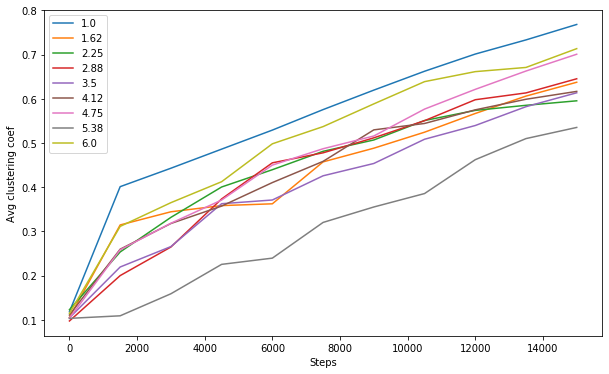

In [523]:
print('calculating average clustering coefficient for varying gamma values')
plt.figure(figsize=(10,6))
finalclustering=np.zeros(9)
for i in range(9):
    clustering_consensus=np.zeros((15,11))
    at_steps=[0]
    for x in range(15):
        sim=SocialDynamicsSimulation(gamma=gamma_range1[i])
        sim.initialize()
        clustering_consensus[x][0]=nx.average_clustering(sim.graph)
        for cut in range(10):
            for s in range(1500):
                sim.update()
            clustering_consensus[x][cut+1]=nx.average_clustering(sim.graph)
            if x==0:
                at_steps.append(sim.step)
    clustering=np.mean(clustering_consensus,axis=0)        
    finalclustering[i]=clustering[-1]
    plt.plot(at_steps,clustering,label=np.around(gamma_range1[i],decimals=2))
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Avg clustering coef')
plt.show()

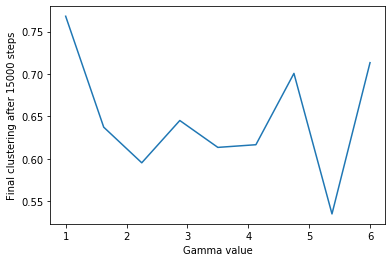

In [524]:
plt.plot(gamma_range1,finalclustering)
plt.xlabel('Gamma value')
plt.ylabel('Final clustering after 15000 steps')
plt.show()